Trabalho 

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prepPCA import DataPreparation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [2]:
prep = DataPreparation()

train_db = pd.read_csv("dataset/train_radiomics_hipocamp.csv")
test_db = pd.read_csv("dataset/test_radiomics_hipocamp.csv")
control_db = pd.read_csv("dataset/train_radiomics_occipital_CONTROL.csv")

train_db = prep.prep_train(train_db)
test_db = prep.transform(test_db)
control_db = prep.transform(control_db)

In [3]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PC1         305 non-null    float64
 1   PC2         305 non-null    float64
 2   PC3         305 non-null    float64
 3   PC4         305 non-null    float64
 4   PC5         305 non-null    float64
 5   PC6         305 non-null    float64
 6   PC7         305 non-null    float64
 7   PC8         305 non-null    float64
 8   PC9         305 non-null    float64
 9   PC10        305 non-null    float64
 10  PC11        305 non-null    float64
 11  PC12        305 non-null    float64
 12  PC13        305 non-null    float64
 13  PC14        305 non-null    float64
 14  PC15        305 non-null    float64
 15  PC16        305 non-null    float64
 16  PC17        305 non-null    float64
 17  PC18        305 non-null    float64
 18  PC19        305 non-null    float64
 19  PC20        305 non-null    f

In [4]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     100 non-null    float64
 1   PC2     100 non-null    float64
 2   PC3     100 non-null    float64
 3   PC4     100 non-null    float64
 4   PC5     100 non-null    float64
 5   PC6     100 non-null    float64
 6   PC7     100 non-null    float64
 7   PC8     100 non-null    float64
 8   PC9     100 non-null    float64
 9   PC10    100 non-null    float64
 10  PC11    100 non-null    float64
 11  PC12    100 non-null    float64
 12  PC13    100 non-null    float64
 13  PC14    100 non-null    float64
 14  PC15    100 non-null    float64
 15  PC16    100 non-null    float64
 16  PC17    100 non-null    float64
 17  PC18    100 non-null    float64
 18  PC19    100 non-null    float64
 19  PC20    100 non-null    float64
 20  PC21    100 non-null    float64
 21  PC22    100 non-null    float64
 22  PC2

In [5]:
X = train_db.drop(columns=["Transition"]) 
y = train_db["Transition"]  

In [6]:
X_train = pd.read_csv('prepPCA/train_X.csv')
X_test = pd.read_csv('prepPCA/test_X.csv')
y_train = pd.read_csv('prepPCA/train_y.csv')
y_test = pd.read_csv('prepPCA/test_y.csv')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
F1 Score médio com validação cruzada: 0.3115623086953279


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de Confusão:


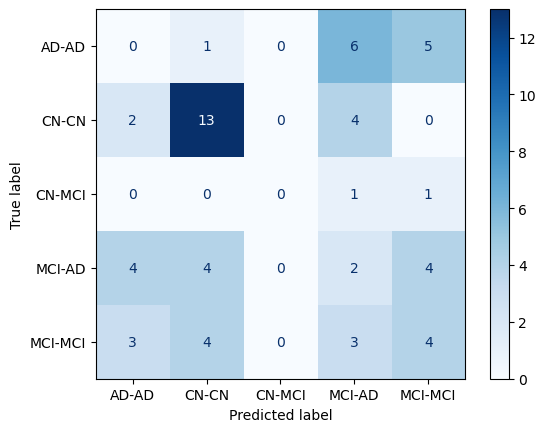


Relatório de Classificação:
              precision    recall  f1-score   support

       AD-AD       0.00      0.00      0.00        12
       CN-CN       0.59      0.68      0.63        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.12      0.14      0.13        14
     MCI-MCI       0.29      0.29      0.29        14

    accuracy                           0.31        61
   macro avg       0.20      0.22      0.21        61
weighted avg       0.28      0.31      0.29        61



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [7]:
clf = GradientBoostingClassifier(random_state=2024)

"""
param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.1,0.3],
    'max_depth': [3,5,7],
    'min_samples_leaf': [2,5],
    'min_samples_split': [2,5],
}
"""

param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.1,0.3],
    'max_depth': [3,5,7],
    'min_samples_leaf': [2,5],
    'min_samples_split': [2,5],
}

cv_strategy = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=clf, 
    param_grid=param_grid, 
    scoring='f1_macro',  
    cv=cv_strategy,        
    verbose=1,              
    refit=True,
    n_jobs=-1 
)

grid_search.fit(X, y)

print("Melhores parâmetros encontrados:", grid_search.best_params_)

best_model = grid_search.best_estimator_

print("F1 Score médio com validação cruzada:", grid_search.best_score_)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

In [33]:
CX = control_db.drop(columns=["Transition"]) 
Cy = control_db["Transition"]  

control_pred = best_model.predict(CX)

control_f1_score = f1_score(Cy, control_pred, average='macro')
print("F1-Score no conjunto de controle:", control_f1_score)

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(Cy, control_pred, cmap='Blues')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação no conjunto de controle:")
print(classification_report(Cy, control_pred))

Cross F1-macro score: 0.2347


### Guardar o melhor modelo do Gradient Bosst

In [1]:
best_model.fit(X, y)
test_predictions = best_model.predict(test_db)

row_ids = range(1, len(test_predictions) + 1)

output_df = pd.DataFrame({
    "RowId": row_ids,
    "Result": test_predictions
})


output_df.to_csv("resultados/gbPCA.csv", index=False)

NameError: name 'best_model' is not defined